<a href="https://colab.research.google.com/github/Vivek2222/AI-Launchpad/blob/main/Day_2_Assignment_1_Implement_the_Transformer_Model_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 6-1 Transformers Model: https://github.com/toni-ramchandani/AIMasterClassTTT/blob/main/Section6-1_Transformers.ipynb

**Step 1: Set Up Your Google Colab Environment**

In [ ]:
# Install Required Libraries: These commands install PyTorch, which we'll use to implement the Transformer model.

!pip install torch
!pip install torchvision

**Step 2: Implement the Transformer Model**

In [ ]:
# Import Libraries:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

#Define the Scaled Dot-Product Attention:
Scaled Dot-Product Attention is a core component of the Transformer architecture used in natural language processing and computer vision. It computes the attention weights for each element in a sequence relative to all others. It is "scaled" to prevent extremely large dot-product values when the dimensions of input vectors are large.

#Implementing Self-Attention Mechanism
Below is the implementation of the self-attention mechanism, which incorporates Scaled Dot-Product Attention:

In [ ]:
# Define the ScaledDotProductAttention class, which is a type of attention mechanism used in Transformer models
class ScaledDotProductAttention(nn.Module):
    def __init__(self, d_k):
        super(ScaledDotProductAttention, self).__init__()
        self.d_k = d_k  # d_k is the dimensionality of the keys and queries, used for scaling the dot product

    # The forward method defines how the input data moves through this layer
    def forward(self, query, key, value, mask=None):
        # Compute the dot product between the query and the transpose of the key
        # The transpose operation swaps the last two dimensions of the key
        # This dot product gives us a score matrix that represents the similarity between queries and keys
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(self.d_k)

        # If a mask is provided, apply it to the scores
        # This is usually done to ignore certain positions in the input (e.g., padding tokens)
        # The masked positions are filled with a large negative value (-1e9) so that their softmax result is close to zero
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        # Apply the softmax function to the scores to obtain attention weights
        # Softmax is applied along the last dimension to ensure the weights sum up to 1
        attention = F.softmax(scores, dim=-1)

        # Multiply the attention weights with the value vectors
        # This step generates the output by weighting the value vectors according to the attention weights
        output = torch.matmul(attention, value)

        # Return the output and the attention weights
        return output, attention

### **Summary:**

The provided code defines a **ScaledDotProductAttention** class, which implements the core mechanism of attention in Transformer models. The goal is to calculate **attention scores** that measure the similarity between a set of queries and keys, normalize these scores using softmax to form **attention weights**, and use these weights to combine the corresponding values into a final output.

### **Steps in the Code:**
1. **Compute Scores:**  
   Calculate similarity between each query and key using a scaled dot product:
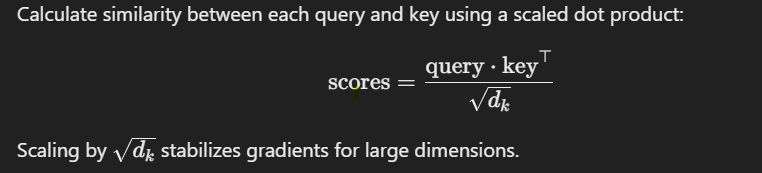
2. **Apply Mask (Optional):**  
   Mask specific positions (e.g., padding tokens) by assigning very negative values to their scores, so their influence is near zero after softmax.

3. **Calculate Attention Weights:**  
   Use softmax to normalize the scores along the last dimension, converting them into probabilities.

4. **Generate Output:**  
   Multiply the attention weights by the corresponding values to get a weighted sum.

5. **Return:**  
   The final output and the attention weights are returned.

---

### **Analogy: A Search Engine Example**

Imagine you are searching for a specific topic on a search engine:

1. **Query (You):**  
   You type a query (e.g., "best pizza places"). This represents the **query vector**.

2. **Key (Web Pages):**  
   The search engine has metadata (keywords) for every web page. These are the **key vectors**.

3. **Value (Web Pages' Content):**  
   The actual content of the web pages is the **value vector**.

4. **Relevance Scores:**  
   The search engine compares your query against all keys (metadata) using a similarity measure (e.g., dot product). It scales these scores to balance large queries.

5. **Normalization (Softmax):**  
   The search engine ranks the results by normalizing the relevance scores into probabilities.

6. **Final Output:**  
   You receive the most relevant web pages, weighted by their relevance to your query. This corresponds to the **attention mechanism combining values (web pages)**.

---

### **Key Takeaway:**
This class lets a Transformer model focus on the most relevant parts of the input by calculating **attention weights** based on similarity, normalizing them, and generating a context-aware output.

#Define the Multi-Head Attention Layer:

Multi-Head Attention (MHA) is a mechanism that enhances the self-attention process in Transformer models by allowing the model to focus on different parts of the input sequence simultaneously. It achieves this by creating multiple "attention heads," where each head independently learns attention weights and computes context vectors. These outputs are then combined to produce the final result.

#How Does Multi-Head Attention Work?
**Input Projections:**
The input (e.g., word embeddings) is linearly transformed into query (Q), key (K), and value (V) vectors for each head. These projections are learned independently for every attention head.

**Scaled Dot-Product Attention:**
Each head performs scaled dot-product attention on its projected 𝑄,K,and V, allowing the model to focus on different relationships or patterns in the input.

**Concatenation:**
The outputs of all attention heads are concatenated.

**Final Projection:**
The concatenated output is passed through a final linear layer to produce the output of the multi-head attention mechanism.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# Define the MultiHeadAttention class, which is a core component of the Transformer model
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads  # The number of attention heads
        self.d_k = d_model // num_heads  # The dimension of each head (d_model divided by num_heads)

        # Linear layers to project the input query, key, and value vectors into the required dimensions
        self.query_linear = nn.Linear(d_model, d_model)
        self.key_linear = nn.Linear(d_model, d_model)
        self.value_linear = nn.Linear(d_model, d_model)

        # Linear layer to project the concatenated output of all heads back into the original d_model dimension
        self.out_linear = nn.Linear(d_model, d_model)

    # The forward method defines how the input data moves through this layer
    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)  # Get the batch size from the query input

        # Project the query, key, and value inputs into multiple heads
        # Each projection is reshaped to [batch_size, num_heads, sequence_length, d_k]
        query = self.query_linear(query).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        key = self.key_linear(key).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        value = self.value_linear(value).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)

        # Apply scaled dot-product attention for each head
        # The attention function returns the attention-weighted values
        attention, _ = ScaledDotProductAttention(self.d_k)(query, key, value, mask)

        # Transpose and reshape the attention output back to [batch_size, sequence_length, d_model]
        attention = attention.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.d_k)

        # Apply the final linear transformation to combine the heads' outputs
        output = self.out_linear(attention)
        return output  # Return the final output of the multi-head attention mechanism

### **Explanation of the Code**

This code defines a **Multi-Head Attention (MHA)** module, a fundamental part of Transformer models like GPT and BERT. It allows the model to focus on multiple parts of the input sequence simultaneously, improving its ability to understand context and relationships.

---

### **Analogy: Multi-Head Attention as a Team of Experts**

Imagine you’re reading a book with a team of experts:
1. **Team Members (Heads):**  
   Each expert focuses on a specific aspect of the text (e.g., grammar, plot, or character development).

2. **Dividing the Work (Splitting into Heads):**  
   The text is given to each expert, who reviews it based on their expertise.

3. **Individual Analysis (Attention in Heads):**  
   Each expert evaluates how important different parts of the text are (queries and keys) and extracts the relevant information (values).

4. **Combining Results:**  
   All the experts' insights are brought together, summarized, and presented as a cohesive understanding of the text.

---

### **Summary**

- **Purpose:**  
  Multi-Head Attention enables a Transformer model to focus on multiple relationships within the input sequence simultaneously.

- **Steps:**  
  1. Split input embeddings into multiple attention heads.
  2. Apply scaled dot-product attention in parallel for each head.
  3. Concatenate and merge the outputs of all heads.

- **Key Benefits:**
  - Diverse Focus:
    Each head captures different patterns or relationships.
  - Improved Representation:
    Allows the model to process input sequences more contextually.
  -Scalability:
    Works effectively for long sequences by breaking the attention mechanism into smaller, parallel parts.

In short, MHA is a powerful mechanism for helping models like GPT understand text better by looking at multiple aspects of the input at the same time.



#Implement Positional Encoding:

Positional encoding is crucial in Transformer models as they lack inherent sequential information. Unlike RNNs, which process tokens in sequence, Transformers process all tokens simultaneously. Positional encoding provides the model with information about the order of tokens in a sequence.

**Add positional encoding to handle the order of tokens in the sequence:**

In [ ]:
# Define the PositionalEncoding class, which is used to inject information about the relative or absolute position of tokens in a sequence.
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()

        # Initialize an empty encoding matrix with shape [max_len, d_model]
        self.encoding = torch.zeros(max_len, d_model)

        # Create a tensor with shape [max_len, 1], where each element represents the position in the sequence
        position = torch.arange(0, max_len).unsqueeze(1)

        # Calculate the division term, which is based on the position and model dimension
        # The division term varies across dimensions and is used to scale the position
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))

        # Apply sine to even indices (starting at 0) in the encoding matrix
        self.encoding[:, 0::2] = torch.sin(position * div_term)

        # Apply cosine to odd indices (starting at 1) in the encoding matrix
        self.encoding[:, 1::2] = torch.cos(position * div_term)

        # Add an extra dimension at the start of the encoding tensor to match batch dimensions
        # The resulting shape is [1, max_len, d_model]
        self.encoding = self.encoding.unsqueeze(0)

    # Forward method that adds the positional encoding to the input tensor x
    def forward(self, x):
        # The encoding tensor is added to the input x, which is expected to have a shape of [batch_size, sequence_length, d_model]
        # The encoding is sliced to match the sequence length of x and moved to the same device as x
        return x + self.encoding[:, :x.size(1), :].to(x.device)

##Key Points
1. Purpose:
Positional encoding injects sequential information into the model.

2. Application:
It is added to input embeddings before passing them to attention layers.

3. Interpretation:
Each token in the sequence gets a unique "position signal" that helps the model understand the order.

With positional encoding, Transformers can process sequences while respecting token order, enabling them to handle tasks like language modeling or sequence translation effectively.

### **Analogy**
Think of positional encoding as assigning "coordinates" to each token in a sequence:
- Imagine a parade where each marcher has a specific position.
- Each marcher's uniform has a unique pattern based on their position.
- These patterns help observers (the Transformer model) distinguish and understand the roles and relationships of the marchers (tokens).

### **Summary**
- **Purpose:** Adds information about the position of tokens in a sequence to their embeddings.  
- **Why Sine and Cosine?**  
  - They provide a continuous and unique signal for each position.  
  - They make relative position differences easy to compute.  
- **How it Helps:** Positional encodings allow Transformers to model the sequence order, enabling them to process tasks like text understanding, translation, and more.  

##Explanation of the EncoderLayer Code
This EncoderLayer class represents one layer of a Transformer encoder. Each layer combines two main components: a self-attention mechanism and a feedforward neural network, with residual connections and normalization applied to improve learning.



In [ ]:
# Define the EncoderLayer class, which is a single layer of the Transformer encoder
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()

        # Initialize the MultiHeadAttention mechanism
        self.self_attn = MultiHeadAttention(d_model, num_heads)

        # Define the feedforward network as a sequence of layers
        self.ff = nn.Sequential(
            nn.Linear(d_model, d_ff),  # Linear transformation from d_model to d_ff dimensions
            nn.ReLU(),  # Apply ReLU activation function
            nn.Linear(d_ff, d_model)  # Linear transformation back to d_model dimensions
        )

        # Layer normalization applied after the self-attention sub-layer
        self.layer_norm1 = nn.LayerNorm(d_model)

        # Layer normalization applied after the feedforward sub-layer
        self.layer_norm2 = nn.LayerNorm(d_model)

        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(dropout)

    # The forward method defines the flow of data through this layer
    def forward(self, x, mask=None):
        # Apply self-attention mechanism
        # The input x is passed as query, key, and value, which is typical for self-attention
        attn_output = self.self_attn(x, x, x, mask)

        # Add the attention output to the input (residual connection) and apply layer normalization
        x = self.layer_norm1(x + self.dropout(attn_output))

        # Pass the normalized output through the feedforward network
        ff_output = self.ff(x)

        # Add the feedforward output to the input (residual connection) and apply layer normalization
        x = self.layer_norm2(x + self.dropout(ff_output))

        # Return the final output of this encoder layer
        return x

### **Analogy**
Think of this as a two-step refinement process for understanding a paragraph:
- **Self-Attention:** Like reviewing each sentence in the paragraph in the context of the others to grasp the bigger picture.
- **Feedforward Network:** Adds deeper meaning to each sentence based on the refined understanding.  
The residual connections ensure the model doesn’t lose any original context during these refinements.

### **Summary**
- **Purpose:** Processes a sequence of tokens by enriching their embeddings with context and additional layers of meaning.  
- **Key Features:**  
  - **Self-Attention:** Helps each token focus on other relevant tokens.  
  - **Feedforward Network:** Introduces depth to the representation.  
  - **LayerNorm and Residual Connections:** Stabilize training and ensure no information is lost.  
- **Output:** Enhanced token representations, ready for deeper layers of the Transformer.  


### **Explanation of the DecoderLayer Code**

The `DecoderLayer` class represents one layer of a Transformer decoder. It combines three main components:

1. **Self-Attention Mechanism**:  
   The first attention mechanism focuses on understanding the relationships within the target sequence (the sequence being decoded). Each token in the target sequence attends to other tokens within the same sequence, helping the model understand the context of each token in relation to the others.

2. **Cross-Attention Mechanism**:  
   The second attention mechanism is designed to allow the decoder to attend to the encoder's output. This is crucial for tasks like machine translation, where the decoder must generate a sequence based on the information in the source sequence (processed by the encoder).

3. **Feedforward Neural Network**:  
   After both attention mechanisms process the input, the output is passed through a feedforward neural network. This network adds depth and complexity to the learned representations, making them more expressive and capable of capturing intricate patterns.

4. **Residual Connections & Layer Normalization**:  
   To stabilize training and ensure the model does not lose important information, residual connections are used. These allow the input to bypass the layers and be added directly to the output. Layer normalization is applied after each sub-layer (self-attention, cross-attention, and feedforward) to ensure consistent scaling of the activations and improve model convergence.

### **Summary**:
The `DecoderLayer` processes the target sequence while leveraging information from the source sequence. The combination of self-attention, cross-attention, and feedforward neural networks with normalization and residual connections ensures that the model can effectively generate sequences by understanding both the input and its own outputs.

In [ ]:
# Define the DecoderLayer class, which is a single layer of the Transformer decoder
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(DecoderLayer, self).__init__()

        # Self-attention mechanism for the target sequence (decoder input)
        self.self_attn = MultiHeadAttention(d_model, num_heads)

        # Cross-attention mechanism that attends to the encoder output
        self.cross_attn = MultiHeadAttention(d_model, num_heads)

        # Feedforward network as a sequence of layers
        self.ff = nn.Sequential(
            nn.Linear(d_model, d_ff),  # Linear transformation from d_model to d_ff dimensions
            nn.ReLU(),  # Apply ReLU activation function
            nn.Linear(d_ff, d_model)  # Linear transformation back to d_model dimensions
        )

        # Layer normalization applied after self-attention sub-layer
        self.layer_norm1 = nn.LayerNorm(d_model)

        # Layer normalization applied after cross-attention sub-layer
        self.layer_norm2 = nn.LayerNorm(d_model)

        # Layer normalization applied after the feedforward sub-layer
        self.layer_norm3 = nn.LayerNorm(d_model)

        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(dropout)

    # The forward method defines the flow of data through this layer
    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        # Apply self-attention mechanism on the decoder input (target sequence)
        # The input x is passed as query, key, and value, similar to the encoder's self-attention
        attn_output = self.self_attn(x, x, x, tgt_mask)

        # Add the attention output to the input (residual connection) and apply layer normalization
        x = self.layer_norm1(x + self.dropout(attn_output))

        # Apply cross-attention mechanism, attending to the encoder output (source sequence)
        # The decoder input x is the query, and the encoder output (enc_output) is the key and value
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)

        # Add the cross-attention output to the input and apply layer normalization
        x = self.layer_norm2(x + self.dropout(attn_output))

        # Pass the normalized output through the feedforward network
        ff_output = self.ff(x)

        # Add the feedforward output to the input (residual connection) and apply layer normalization
        x = self.layer_norm3(x + self.dropout(ff_output))

        # Return the final output of this decoder layer
        return x

### **Analogy**
Think of the **DecoderLayer** as a skilled translator in a language translation task:

1. **Self-Attention** (in the decoder):  
   Like a translator reading the sentence they are translating and referring back to different parts of it, trying to understand the full context of each word within that sentence.

2. **Cross-Attention** (with encoder output):  
   Once the translator understands the current sentence, they reference the source sentence (encoded by the encoder) to ensure their translation matches the meaning conveyed in the original language.

3. **Feedforward Network**:  
   The translator refines their translation after considering the context from the source sentence and the target sentence. They may adjust the wording or syntax for better fluency.

4. **Residual Connections & LayerNorm**:  
   Ensure the original meaning (context) is retained during translation, and adjustments (like word choices or sentence structure) are applied without losing the original sentence’s integrity.

### **Summary**
- **Purpose**: Processes the target sequence while also considering the encoder's output, which helps in generating translated sequences (or sequences in general).
  
- **Key Features**:
  - **Self-Attention**: Helps the decoder focus on relevant parts of the target sequence.
  - **Cross-Attention**: Allows the decoder to attend to the encoder’s output, capturing the relationship between source and target sequences.
  - **Feedforward Network**: Refines the decoded output to enhance the representation.
  - **Residual Connections & LayerNorm**: Stabilizes training and ensures the decoder’s output remains rich in context.

- **Output**: Refined sequence representation, incorporating information from both the target (self-attention) and the source (cross-attention) sequences, ready to be processed further in the decoder stack.

#Build the Transformer Model

### **Explanation of the Transformer Model Code**

The `Transformer` class represents the entire Transformer architecture, which is a deep learning model designed for sequence-to-sequence tasks like translation, text generation, etc. It consists of multiple components including embeddings, positional encodings, encoder and decoder layers, and a final output layer.

#### **Key Components**:

1. **Encoder Embedding Layer**:
   - The source input sequence (for example, in machine translation, this could be the sentence in the source language) is first passed through an embedding layer.
   - This layer converts each token in the input sequence into a dense vector representation of size `d_model`.

2. **Decoder Embedding Layer**:
   - Similarly, the target sequence (e.g., the sentence in the target language) is passed through a separate embedding layer.
   - It also converts tokens in the target sequence into embeddings of size `d_model`.

3. **Positional Encoding**:
   - Since the Transformer doesn't have a built-in mechanism to understand the order of tokens, we add **positional encoding** to the token embeddings to provide information about the position of tokens within the sequence.
   - This is done using a `PositionalEncoding` class that applies sine and cosine functions to create a unique encoding for each position.

4. **Encoder Layers**:
   - The model contains a stack of **encoder layers**. Each encoder layer includes a self-attention mechanism, followed by a feedforward network.
   - The input sequence is processed through each encoder layer, refining the representation at each step.

5. **Decoder Layers**:
   - The model also contains a stack of **decoder layers**. Each decoder layer has:
     - **Self-attention**: Helps each token in the target sequence focus on other tokens in the target sequence.
     - **Cross-attention**: Allows the decoder to focus on the encoder's output (the source sequence), helping it generate an output sequence based on the input sequence.
     - **Feedforward Network**: Introduces further complexity and depth to the decoder's representations.

6. **Final Linear Layer**:
   - After passing through all the decoder layers, the final output of the decoder is passed through a **linear layer**.
   - This layer maps the decoder's output into a vector of size equal to the vocabulary size (the output space).
   - This output is then used for generating predictions (like the next token in a sequence) and is usually followed by a **softmax** layer during training to convert the output into probabilities.

#### **How It Works (Flow)**:
- **Input Sequence (Source)**: The input sequence is embedded and positional encoding is added. It is passed through multiple encoder layers to get a refined representation.
  
- **Output Sequence (Target)**: The target sequence is also embedded, positional encoding is added, and then it passes through multiple decoder layers. The decoder attends to both the target sequence (via self-attention) and the encoder's output (via cross-attention).

- **Final Prediction**: The final output of the decoder layers is passed through a linear layer to get the prediction, typically representing the next token in the sequence.

#### **Summary**:
The `Transformer` class is the complete architecture that implements the core functionality of the Transformer model. It uses embeddings, positional encodings, a stack of encoder and decoder layers, and a final linear layer to generate sequence-to-sequence outputs. The self-attention and cross-attention mechanisms, along with feedforward networks and normalization, ensure that the model can efficiently capture complex relationships in sequence data, making it powerful for tasks like machine translation, text generation, and more.

In [ ]:
# Define the Transformer class, which represents the complete Transformer model architecture
class Transformer(nn.Module):
    def __init__(self, d_model, num_heads, num_encoder_layers, num_decoder_layers, d_ff, input_vocab_size, output_vocab_size, max_len=5000, dropout=0.1):
        super(Transformer, self).__init__()

        # Embedding layer for the source input sequence (encoder input)
        self.encoder_embedding = nn.Embedding(input_vocab_size, d_model)

        # Embedding layer for the target input sequence (decoder input)
        self.decoder_embedding = nn.Embedding(output_vocab_size, d_model)

        # Positional encoding to add positional information to the input embeddings
        self.positional_encoding = PositionalEncoding(d_model, max_len)

        # Stack of encoder layers, each composed of self-attention and feedforward sub-layers
        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_encoder_layers)])

        # Stack of decoder layers, each composed of self-attention, cross-attention, and feedforward sub-layers
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_decoder_layers)])

        # Final linear layer that maps the decoder output to the output vocabulary size
        self.final_linear = nn.Linear(d_model, output_vocab_size)

    # The forward method defines how the data flows through the Transformer model
    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        # Embed the source input sequence (src) and scale the embeddings by the square root of the model dimension
        src = self.encoder_embedding(src) * torch.sqrt(torch.tensor(d_model, dtype=torch.float32))

        # Add positional encodings to the embedded source sequence
        src = self.positional_encoding(src)

        # Pass the source sequence through each encoder layer in the stack
        for layer in self.encoder_layers:
            src = layer(src, src_mask)

        # Embed the target input sequence (tgt) and scale the embeddings by the square root of the model dimension
        tgt = self.decoder_embedding(tgt) * torch.sqrt(torch.tensor(d_model, dtype=torch.float32))

        # Add positional encodings to the embedded target sequence
        tgt = self.positional_encoding(tgt)

        # Pass the target sequence through each decoder layer in the stack
        for layer in self.decoder_layers:
            tgt = layer(tgt, src, tgt_mask, src_mask)

        # Pass the output of the final decoder layer through the final linear layer
        # This maps the output to the vocabulary space, producing a distribution over the output vocabulary
        output = self.final_linear(tgt)

        # Return the final output, which is typically passed to a softmax layer during training
        return output

### **Analogy**:
Think of the Transformer model as a **translator** working on a **two-step process**:

1. **Encoder (Source Language Understanding)**:
   - Imagine you're trying to understand a sentence in a foreign language (e.g., French). The **encoder** is like a **linguist** who reads the sentence, processes it word by word, and identifies the relationships between the words to understand their meaning. However, the linguist also knows the order of the words (positional encoding) and can focus on relevant parts of the sentence (self-attention).
   
2. **Decoder (Target Language Generation)**:
   - Once the linguist understands the meaning, they start translating the sentence into the target language (e.g., English). The **decoder** is like the **translator** who, while translating each word, looks at both the context of the sentence in the target language and the original sentence (via cross-attention) to ensure the translation is accurate. The translator continuously refines the translation (feedforward network) and ensures no part of the meaning is lost.

### **Summary**:
The Transformer model is a sophisticated architecture designed for tasks like translation or text generation. It works by processing input sequences through an **encoder** and output sequences through a **decoder**. Key components include:

- **Embedding Layers**: Convert words into dense vectors.
- **Positional Encoding**: Adds information about the order of words in the sequence.
- **Self-Attention**: Allows each word to focus on other relevant words in the sequence.
- **Cross-Attention**: Lets the decoder attend to the encoder's output for context.
- **Feedforward Networks**: Introduce additional complexity to refine representations.
- **Final Linear Layer**: Maps the decoder output to the target vocabulary.

In essence, the Transformer model excels at handling sequential data by allowing flexible attention mechanisms, enabling it to process long-range dependencies and generate accurate outputs for complex tasks.

#Define Example Usage:

In this example, we demonstrate how to test the Transformer model using dummy data. The goal is to verify that the model works with random input and output sequences, and ensure the shapes of the output tensor are as expected. Here's an explanation of each part:

In [ ]:
# Define the vocabulary sizes for the source and target languages
input_vocab_size = 10000  # Source vocabulary size
output_vocab_size = 10000  # Target vocabulary size

# Set the dimensionality of the model, which determines the size of the embeddings and the model's internal representations
d_model = 512  # Dimensionality of the embeddings and model

# Define the number of attention heads in the multi-head attention mechanism
num_heads = 8  # Number of attention heads

# Set the number of layers in the encoder and decoder stacks
num_encoder_layers = 6  # Number of encoder layers
num_decoder_layers = 6  # Number of decoder layers

# Define the dimensionality of the feedforward network within each layer
d_ff = 2048  # Dimensionality of the feedforward network

# Set the maximum length for the input and output sequences
max_len = 100  # Maximum length of the input and output sequences

# Instantiate the Transformer model with the specified parameters
model = Transformer(d_model, num_heads, num_encoder_layers, num_decoder_layers, d_ff, input_vocab_size, output_vocab_size, max_len)

# Generate a batch of random source sentences
# Each sentence has 100 tokens, and there are 32 sentences in the batch
src = torch.randint(0, input_vocab_size, (32, 100))  # Source sentences (randomly generated)

# Generate a batch of random target sentences
# Each sentence has 100 tokens, and there are 32 sentences in the batch
tgt = torch.randint(0, output_vocab_size, (32, 100))  # Target sentences (randomly generated)

# Pass the source and target sentences through the Transformer model
output = model(src, tgt)

# Print the shape of the output tensor
# Expected shape: [32, 100, 10000], corresponding to [batch size, sequence length, output vocab size]
print(output.shape)


torch.Size([32, 100, 10000])


### **Analogy**:
Imagine you're a translator at a conference, working with a group of people who speak different languages. You receive sentences from one language (the source), and you need to translate them into another language (the target).

1. **The Transformer Model**: Think of it as a team of advanced translators.
   - The **encoder** reads and understands the source language sentences (like you reading the input text in the source language).
   - The **decoder** then uses the information from the encoder and translates it into the target language (like you generating a translated sentence based on the source).
   - The **attention mechanism** allows the team to focus on the most relevant words in the source sentence while translating, just as you might emphasize key parts of the source text to ensure an accurate translation.

2. **Training the Model**: Before being able to translate perfectly, the team (model) practices with many examples, learning how to align the source and target languages by understanding context, word relationships, and sequence.

### **Summary**:
- **Purpose**: The Transformer model handles the task of translating or transforming sequences (like sentences in language translation). It processes input (source) and generates output (target) while considering the context and relationships within the sequence.
- **Core Components**:
  - **Encoder**: Understands the input sequence (source language).
  - **Decoder**: Translates the encoder’s understanding into the output sequence (target language).
  - **Self-Attention**: Focuses on different parts of the sequence to understand relationships between words.
  - **Feedforward Layers**: Add additional depth to the representation of the sequence.
  - **Positional Encoding**: Ensures the model knows the order of words in a sentence (sequence order).
- **Output**: The model generates a prediction for each token in the sequence, mapped to the vocabulary space. This is typically passed through a softmax layer to obtain probabilities for each possible token in the target sequence.

### **Model Output**:
The output of the Transformer model is a tensor of shape `[batch_size, sequence_length, output_vocab_size]`. For each position in the sequence, this tensor represents a probability distribution over the entire output vocabulary. This means that for each token in the target sequence, the model predicts the likelihood of every word in the target vocabulary, and the word with the highest probability is chosen as the predicted word.

### **Step 3: Running the Model in Google Colab**

1. **Execute the Code**:
   - You can run each cell in your Google Colab notebook to build and test the Transformer model. This will allow you to evaluate how the model performs on random input and target sentences.

2. **Utilize GPU**:
   - Google Colab provides free access to GPUs, which can significantly speed up the training and evaluation of machine learning models.
   - To enable GPU:
     1. Go to **Runtime** in the top menu.
     2. Select **Change runtime type**.
     3. From the **Hardware accelerator** dropdown, choose **GPU**.
     4. Save and continue.

3. **Save and Share Your Notebook**:
   - After running the notebook and testing the Transformer model, you can save your work and share it with others.
     - To share the notebook, click **Share** in the top-right corner of the Colab interface.
     - You can also download the notebook as a `.ipynb` file or directly export it to **GitHub**.

### **Extending the Model**:
This implementation is a solid starting point for exploring Transformer models. However, you can extend it by:
- Adding **training loops** to train the model on specific datasets (like text translation or other sequence tasks).
- Pre-processing data (e.g., tokenizing text data, padding sequences).
- Fine-tuning the model on specific tasks such as language translation or text generation.
- Experimenting with different **hyperparameters** (e.g., number of layers, attention heads, model size).

This flexibility makes Transformers powerful for a variety of tasks in NLP (Natural Language Processing) and beyond.